<a href="https://colab.research.google.com/github/vijaylokith/Customer-Churn-Prediction/blob/main/Human_Activity_Recognition_using_classicalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Activity Recognition Using Classical Machine Learning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem statement:**  Build a classical machine learning model which predicts the human activity

In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

### **Basic Info About the Data**

data scouce: [link text](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones) 

The very first thing to do in any project is to look and understand the data well.(But the above 4 lines are obvious 😜). 

**Basic Info About the Data:**

-> There are 10299 datapoints in total(train + test).

-> The data provided by the source is already splitted in train and test in 70:30 ratio.

-> Each datapoint belongs to 561 dimension(that is nothing but there are 561   features corresponding to each datapoint)

-> The data is collected from the sensors like accelometer and geyroscope which are present in the smartphone(yes, it is a time series data). But can our classical machine learning algorithms process time series data? No. 

Gendrally in this types of situations we have two options:

1) Either to use techniques like ARIMA or SARIMAX (for forcasting) or use deep learning models like LSTM's or GRU's.

2) Or to do featurisation(like windowing technique and fourier transform) and convert the time series data into numberical data which our ML models can handle.

In our case it is the second option, but this is also 
To know more about the data, [click me](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

## **Obtaining Training Data**


In [5]:
# getting the names of the features

features = []
with open("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/features.txt") as fea:
  for feature in fea.readlines():
    features.append(feature.split()[1])

print(f"number of features = {len(features)}")

number of features = 561


In [6]:
# loading the text into pandas dataframes(training data)
x_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/train/X_train.txt", delim_whitespace = True, header = None)

# adding the features names as the column names for the x_train dataframe
x_train.columns = features

# reading the subject details to the x_train dataframe
x_train["subjects"] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/train/subject_train.txt", squeeze=True,header=None) # squeeze returns a series instead of a dataframe

# obtaining y_train data
y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/train/y_train.txt", squeeze = True, header=None)

# mapping the activity(number) to activity_name
map = dict({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
y_train_lables = y_train.map(map)

print(y_train.head())
x_train.head()

0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjects
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [7]:
# ''' Be carefull while merging or joining two dataframes(to ensure check for the first and last row after merge manually) '''

In [8]:
# combaining both x_train and y_train into a single dataframe
train = x_train
train["activity"] = y_train
train["activity_name"] = y_train_lables

print(train.shape)
train.head(10)

# now we have our training data lets go ahead and get out test data to...

(7352, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjects,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987,...,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010,1,5,STANDING
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987,...,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976,1,5,STANDING
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598,...,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364,1,5,STANDING
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028,...,-0.020590,-0.127730,-0.482871,-0.070670,-0.848294,0.190310,-0.034417,1,5,STANDING


## **Obtaining Testing Data**

In [9]:
# same steps which we did for training data
x_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/test/X_test.txt", delim_whitespace=True, header= None)
x_test.columns = features
x_test["subjects"] = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/test/subject_test.txt", squeeze= True, header=None)

y_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HAR/HAR_Dataset/test/y_test.txt", squeeze= True,header=None)
y_test_lables = y_test.map(map)

print(y_test.head())
x_test.head()

0    5
1    5
2    5
3    5
4    5
Name: 0, dtype: int64


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjects
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2


In [10]:
# combaining both x_test and y_test into a single dataframe
test = x_test
test["activity"] = y_test
test["activity_name"] = y_test_lables

print(test.shape)
test.head(10)

(2947, 564)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subjects,activity,activity_name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
5,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING
6,0.279746,-0.018271,-0.104000,-0.995819,-0.976354,-0.977725,-0.995996,-0.973665,-0.979253,-0.937856,...,-0.309083,-0.000857,0.728514,-0.333771,-0.690085,0.295282,-0.067065,2,5,STANDING
7,0.274601,-0.025035,-0.116831,-0.995594,-0.982069,-0.985262,-0.995341,-0.981485,-0.984610,-0.941263,...,-0.025526,-0.214033,0.437640,-0.366674,-0.688785,0.295981,-0.067706,2,5,STANDING
8,0.272529,-0.020954,-0.114472,-0.996784,-0.975906,-0.986597,-0.997029,-0.973735,-0.985556,-0.941263,...,0.144626,-0.035564,-0.181800,0.087320,-0.685390,0.299394,-0.065491,2,5,STANDING
9,0.275746,-0.010372,-0.099776,-0.998373,-0.986933,-0.991022,-0.998663,-0.987140,-0.991084,-0.943761,...,0.157584,-0.033487,-0.350893,0.343146,-0.684110,0.300822,-0.064263,2,5,STANDING


## **Data Cleaning**

In [11]:
# data cleaning is all about 

# checking for dupicates
# checking for null values
# checking for data imbalance

# in data pre processing we will do correct all the things we found in data cleaning process(remove duplicates, treat the null values, treate the class imbalance)
# do feature scaling, do embedding if we have categorical or textual features, handle outliers, do feature selection 

In [12]:
# check for data duplicates

print(f"No of du[plicates in traning data = {sum(train.duplicated())}")
print(f"No of duplicates in testing data = {sum(test.duplicated())}")

No of du[plicates in traning data = 0
No of duplicates in testing data = 0


In [13]:
# checking for NaN/NULL values
                                                                                   
print(f"No of missing values in training data = {train.isnull().values.sum()}") 
print(f"No of missing values in testing data = {test.isnull().values.sum()}")    

No of missing values in training data = 0
No of missing values in testing data = 0


In [14]:
# checking for data imbalance
balance = []

balance = [train["activity"][train.activity == i].count() for i in range(1,7)]
print(balance)
# we can clearly see that out data is well balanced(not completely balanced, yet far from being imbalanced)

[1226, 1073, 986, 1286, 1374, 1407]


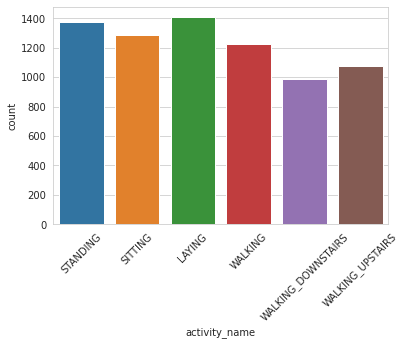

In [15]:
sn.set_style('whitegrid')
sn.countplot(train.activity_name)
plt.xticks(rotation = 45)
plt.show()

In [16]:
# removing symbols from the feature names

feature_name = train.columns

feature_name = feature_name.str.replace('[()]' , "")
feature_name = feature_name.str.replace('[-]' , "")
feature_name = feature_name.str.replace('[,]' , "")

train.columns = feature_name
test_columns = feature_name

train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subjects', 'activity', 'activity_name'],
      dtype='object', length=564)

**Conclusion from Data Cleaning**

1) Data dosen't have any duplicates

2) Data doesn"t have any NULL values

3) Data is well balanced

## **Exploratory Data Analysis**

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAccmeanX to activity_name
dtypes: float64(561), int64(2), object(1)
memory usage: 31.6+ MB


In [18]:
train.describe().transpose

<bound method DataFrame.transpose of        tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
count    7352.000000    7352.000000    7352.000000   7352.000000   
mean        0.274488      -0.017695      -0.109141     -0.605438   
std         0.070261       0.040811       0.056635      0.448734   
min        -1.000000      -1.000000      -1.000000     -1.000000   
25%         0.262975      -0.024863      -0.120993     -0.992754   
50%         0.277193      -0.017219      -0.108676     -0.946196   
75%         0.288461      -0.010783      -0.097794     -0.242813   
max         1.000000       1.000000       1.000000      1.000000   

       tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
count   7352.000000   7352.000000   7352.000000   7352.000000   7352.000000   
mean      -0.510938     -0.604754     -0.630512     -0.526907     -0.606150   
std        0.502645      0.418687      0.424073      0.485942      0.414122   
min       -0.999873     -1.000000 

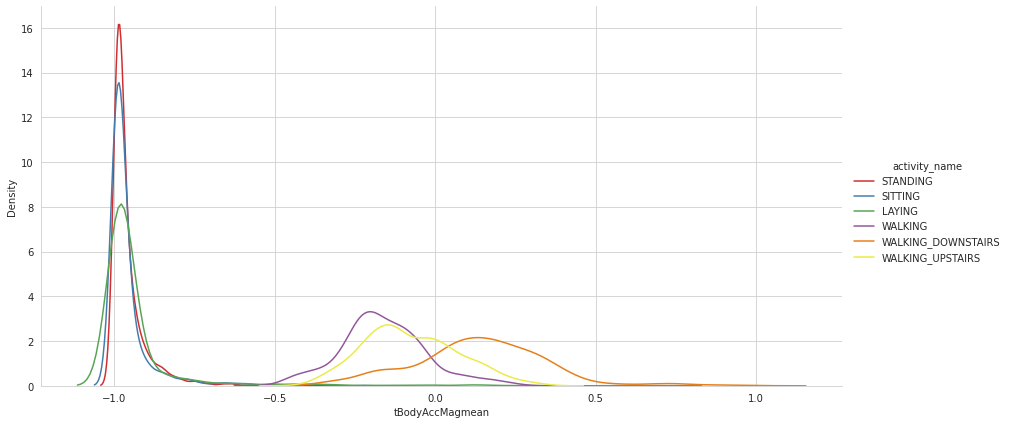

In [19]:
sn.set_palette("Set1", desat=0.80)
facetgrid = sn.FacetGrid(train, hue='activity_name', size=6,aspect=2)
facetgrid.map(sn.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()

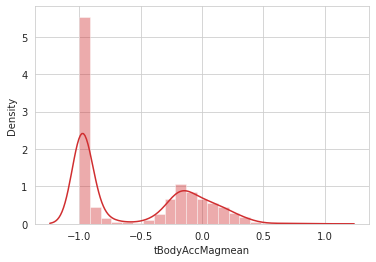

In [20]:
sn.distplot(train['tBodyAccMagmean'])

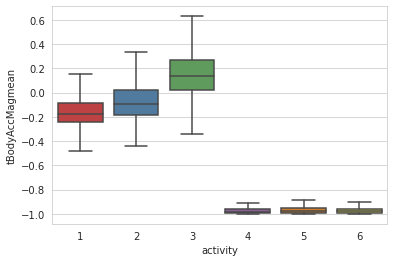

In [21]:
sn.boxplot(x='activity',y='tBodyAccMagmean',data=train,showfliers=False)

> We can clearly observe that "tBodyAccMagmean" feature values can well seperate the static and dynamic activities.

## **Dimensionality Reduction and Visualization (T-SNE)**

In [22]:
from sklearn.manifold import TSNE

In [23]:
df_vis = train.drop(['subjects', 'activity','activity_name'], axis=1)

tsne = TSNE().fit_transform(df_vis)
tsne.shape

(7352, 2)

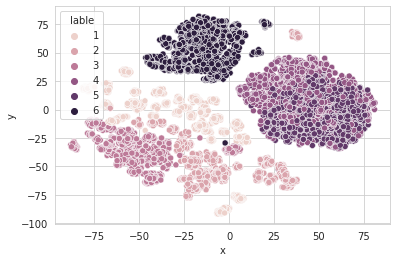

In [24]:
df_y = train["activity"]
x_tsne = tsne[:,0]
y_tsne = tsne[:,1]
rc = pd.DataFrame({"x": x_tsne, "y": y_tsne, "lable": df_y})

sn.scatterplot(x="x",y='y',data=rc,hue='lable')

We can clearly see that the class lables are almost well seperated clusters.

## **Modelling**

In [25]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

**Utility Functions**

In [26]:
# Function to run any specified model

def build_model(model,X_train, y_train, X_test, y_test):
    
    
  # to store results at various phases
  results = dict()
    
  # model training 
  print('training phase...')
  model.fit(X_train, y_train)
  print('fininshed model training \n \n')
    
    
  # predict test data
  print('testing phase..')
  y_pred = model.predict(X_test)
  print('finished predicting..')
  results['predicted'] = y_pred
   

  # computing model accuracy
  accuracy = accuracy_score(y_test, y_pred)
  results['accuracy'] = accuracy
  print('---------------------')
  print('|      Accuracy      |')
  print('---------------------')
  print(f"{accuracy}\n \n")
    
    
  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  results['confusion_matrix'] = cm
  print('--------------------')
  print('| Confusion Matrix |')
  print('--------------------')
  print(f"{cm} \n \n")
        
  # plot confusin matrix
  plot_confusion_matrix(model, x_test, y_test,xticks_rotation='vertical', cmap=plt.cm.Greens)
  plt.show()
    
  # get classification report
  print('-------------------------')
  print('| Classifiction Report |')
  print('-------------------------')
  classification_report = metrics.classification_report(y_test, y_pred)
  results['classification_report'] = classification_report
  print(classification_report)
    

  results['model'] = model

  print_grid_search_attributes(model)
    
  return results

# Function to print the grid search attributes

def print_grid_search_attributes(model):

  print('--------------------------')
  print('|      Best Estimator     |')
  print('--------------------------')
  print(f"{model.best_estimator_} \n \n")


  print('--------------------------')
  print('|     Best parameters     |')
  print('--------------------------')
  print(f"{model.best_params_} \n \n")


  print('---------------------------------')
  print('|   No of CrossValidation sets   |')
  print('--------------------------------')
  print(f"{model.n_splits_} \n \n")


  print('--------------------------')
  print('|        Best Score       |')
  print('--------------------------')
  print(f"{model.best_score_} \n \n")


In [27]:
x_train = train.drop(["subjects","activity","activity_name"], axis=1)
y_train = train.activity_name

x_test = test.drop(["subjects","activity","activity_name"], axis=1)
y_test = test.activity_name

### **1) Logistic Regression**

training phase...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
fininshed model training 
 

testing phase..
finished predicting..
---------------------
|      Accuracy      |
---------------------
0.9582626399728538
 

--------------------
| Confusion Matrix |
--------------------
[[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]] 
 



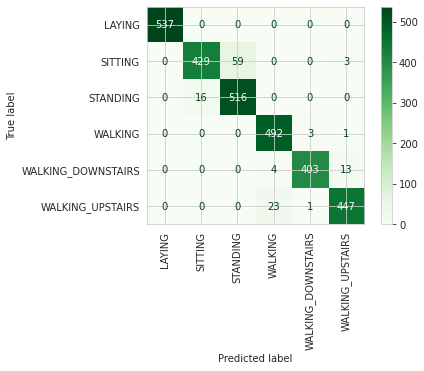

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------
LogisticRegression(C=1) 
 

--------------------------
|     Best parameters     |
--------------------------
{'C': 1, 'penalty': 'l2'} 
 

---------------------------------
|   No of CrossValidation sets   |
-----------------------------

In [28]:
from sklearn.linear_model import LogisticRegression

parameters = {'C':[0.01, 0.1, 1, 10, 20], 'penalty':['l2','l1']}
clf_lr = LogisticRegression()
clf_lr_grid = GridSearchCV(clf_lr, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
lr_results =  build_model(clf_lr_grid, x_train, y_train, x_test, y_test)

### **2) Linear SVM**

training phase...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
fininshed model training 
 

testing phase..
finished predicting..
---------------------
|      Accuracy      |
---------------------
0.9650492025788938
 

--------------------
| Confusion Matrix |
--------------------
[[537   0   0   0   0   0]
 [  2 420  65   0   0   4]
 [  0   7 524   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  17   0 454]] 
 



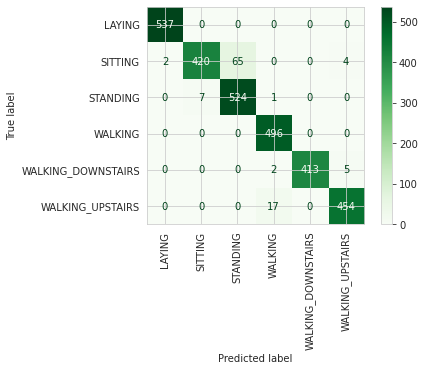

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------
LinearSVC(C=1) 
 

--------------------------
|     Best parameters     |
--------------------------
{'C': 1} 
 

---------------------------------
|   No of CrossValidation sets   |
--------------------------------
5 
 

----------------

In [29]:
from sklearn.svm import LinearSVC 

parameters = {'C':[0.01, 0.1, 1, 10, 20]}
clf_lr_svm = LinearSVC()
clf_lr_svm_grid = GridSearchCV(clf_lr_svm, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
lr_svm_results = build_model(clf_lr_svm_grid, x_train, y_train, x_test, y_test)

### **3) Kernel SVM**

training phase...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
fininshed model training 
 

testing phase..
finished predicting..
---------------------
|      Accuracy      |
---------------------
0.9623345775364778
 

--------------------
| Confusion Matrix |
--------------------
[[537   0   0   0   0   0]
 [  0 440  49   0   0   2]
 [  0  10 522   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 396  20]
 [  0   0   0  17   2 452]] 
 



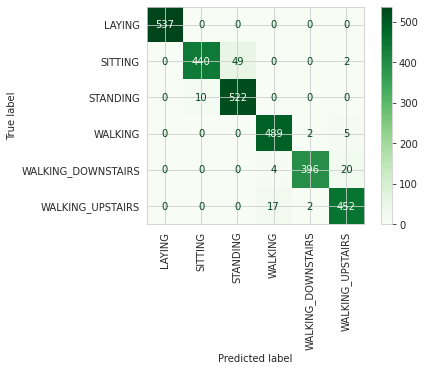

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.90      0.94       491
          STANDING       0.91      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.94      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

--------------------------
|      Best Estimator     |
--------------------------
SVC(C=10, gamma=0.0078125) 
 

--------------------------
|     Best parameters     |
--------------------------
{'C': 10, 'gamma': 0.0078125} 
 

---------------------------------
|   No of CrossValidation sets   |
----------------------

In [30]:
from sklearn.svm import SVC

parameters = {'C':[0.01, 0.1, 1, 10, 20],'gamma': [ 0.0078125, 0.125, 2]}
clf_rbf_svm = SVC(kernel='rbf')
clf_rbf_svm_grid = GridSearchCV(clf_rbf_svm, param_grid=parameters, cv=5, verbose=1, n_jobs=-1)
rbf_svm_results = build_model(clf_rbf_svm_grid, x_train, y_train, x_test, y_test)

### **4) Decision Tree**

training phase...
fininshed model training 
 

testing phase..
finished predicting..
---------------------
|      Accuracy      |
---------------------
0.839497794367153
 

--------------------
| Confusion Matrix |
--------------------
[[537   0   0   0   0   0]
 [  0 403  88   0   0   0]
 [  0 113 419   0   0   0]
 [  0   0   0 470  10  16]
 [  0   0   0  49 266 105]
 [  0   0   0  86   6 379]] 
 



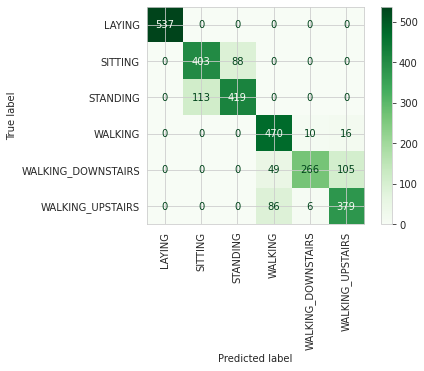

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.78      0.82      0.80       491
          STANDING       0.83      0.79      0.81       532
           WALKING       0.78      0.95      0.85       496
WALKING_DOWNSTAIRS       0.94      0.63      0.76       420
  WALKING_UPSTAIRS       0.76      0.80      0.78       471

          accuracy                           0.84      2947
         macro avg       0.85      0.83      0.83      2947
      weighted avg       0.85      0.84      0.84      2947

--------------------------
|      Best Estimator     |
--------------------------
DecisionTreeClassifier(max_depth=5) 
 

--------------------------
|     Best parameters     |
--------------------------
{'max_depth': 5} 
 

---------------------------------
|   No of CrossValidation sets   |
--------------------------

In [31]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[3,5,10,13,18]}
clf_dt = DecisionTreeClassifier()
clf_dt_grid = GridSearchCV(clf_dt,param_grid=parameters, n_jobs=-1)
dt_results = build_model(clf_dt_grid, x_train, y_train, x_test, y_test)

### **5) Random Forest**

training phase...
fininshed model training 
 

testing phase..
finished predicting..
---------------------
|      Accuracy      |
---------------------
0.9267051238547676
 

--------------------
| Confusion Matrix |
--------------------
[[537   0   0   0   0   0]
 [  0 438  53   0   0   0]
 [  0  46 486   0   0   0]
 [  0   0   0 484  12   0]
 [  0   0   0  25 353  42]
 [  0   0   0  32   6 433]] 
 



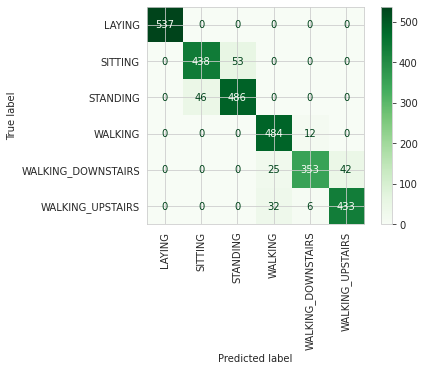

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.89      0.90       491
          STANDING       0.90      0.91      0.91       532
           WALKING       0.89      0.98      0.93       496
WALKING_DOWNSTAIRS       0.95      0.84      0.89       420
  WALKING_UPSTAIRS       0.91      0.92      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------
RandomForestClassifier(max_depth=13, n_estimators=170) 
 

--------------------------
|     Best parameters     |
--------------------------
{'max_depth': 13, 'n_estimators': 170} 
 

---------------------------------
|   No of CrossValid

In [32]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
clf_rf = RandomForestClassifier()
clf_rf_grid = GridSearchCV(clf_rf, param_grid=params, n_jobs=-1)
rf_results = build_model(clf_rf_grid, x_train, y_train, x_test, y_test)

In [34]:
print('\n                     Accuracy \n')
print('                      ---------- \n')
print(f'Logistic Regression : {lr_results["accuracy"]*100} \n')

print(f'Linear SVC          :{lr_svm_results["accuracy"]*100} \n')

print(f'rbf SVM classifier  :{rbf_svm_results["accuracy"]*100} \n')

print(f'DecisionTree        :{dt_results["accuracy"]*100} \n')

print(f'Random Forest       :{rf_results["accuracy"]*100} \n')



                     Accuracy 

                      ---------- 

Logistic Regression : 95.82626399728538 

Linear SVC          :96.50492025788938 

rbf SVM classifier  :96.23345775364778 

DecisionTree        :83.9497794367153 

Random Forest       :92.67051238547675 

